#Animal shelter

In [ ]:
import numpy as np
import pandas as pd
import joblib
# from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import sklearn.metrics as metrics
import matplotlib.ticker as ticker
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas_profiling
%matplotlib inline



In [ ]:
data = pd.read_csv('/content/train.csv')
data

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [ ]:
# Check the NaN values
data.isna().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [ ]:
data.shape

(26729, 10)

In [ ]:
data.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A671945,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AnimalID        26729 non-null  object
 1   Name            19038 non-null  object
 2   DateTime        26729 non-null  object
 3   OutcomeType     26729 non-null  object
 4   OutcomeSubtype  13117 non-null  object
 5   AnimalType      26729 non-null  object
 6   SexuponOutcome  26728 non-null  object
 7   AgeuponOutcome  26711 non-null  object
 8   Breed           26729 non-null  object
 9   Color           26729 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [ ]:
# We should look for the all unique values for each columns
data['OutcomeSubtype'].unique()

array([nan, 'Suffering', 'Foster', 'Partner', 'Offsite', 'SCRP',
       'Aggressive', 'Behavior', 'Rabies Risk', 'Medical', 'In Kennel',
       'In Foster', 'Barn', 'Court/Investigation', 'Enroute', 'At Vet',
       'In Surgery'], dtype=object)

In [ ]:
profile = data.profile_report()
profile.to_file('Data_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

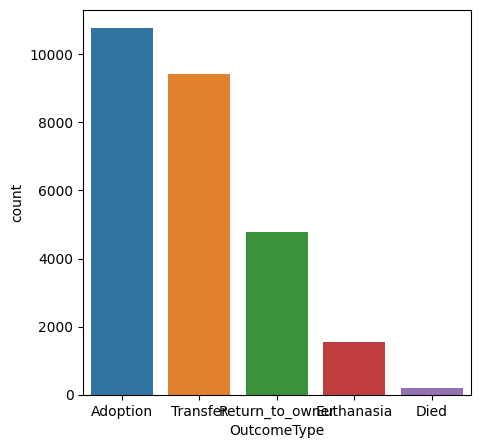

In [ ]:
# The most often outcomes is Adoption and Transfer
plt.figure(figsize=(5,5))
sns.countplot(x='OutcomeType', order=data['OutcomeType'].value_counts().index, data=data)
plt.show()

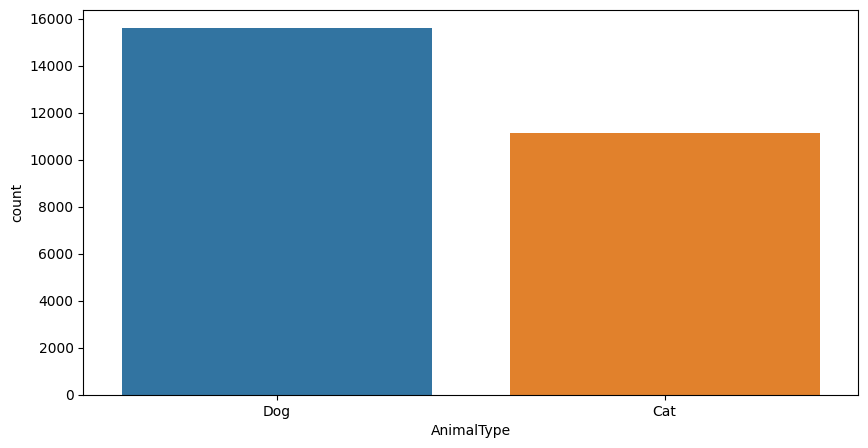

In [ ]:
# Two animal types
plt.figure(figsize=(10,5))
sns.countplot(x='AnimalType',  order=data['AnimalType'].value_counts().index, data=data)
plt.show()

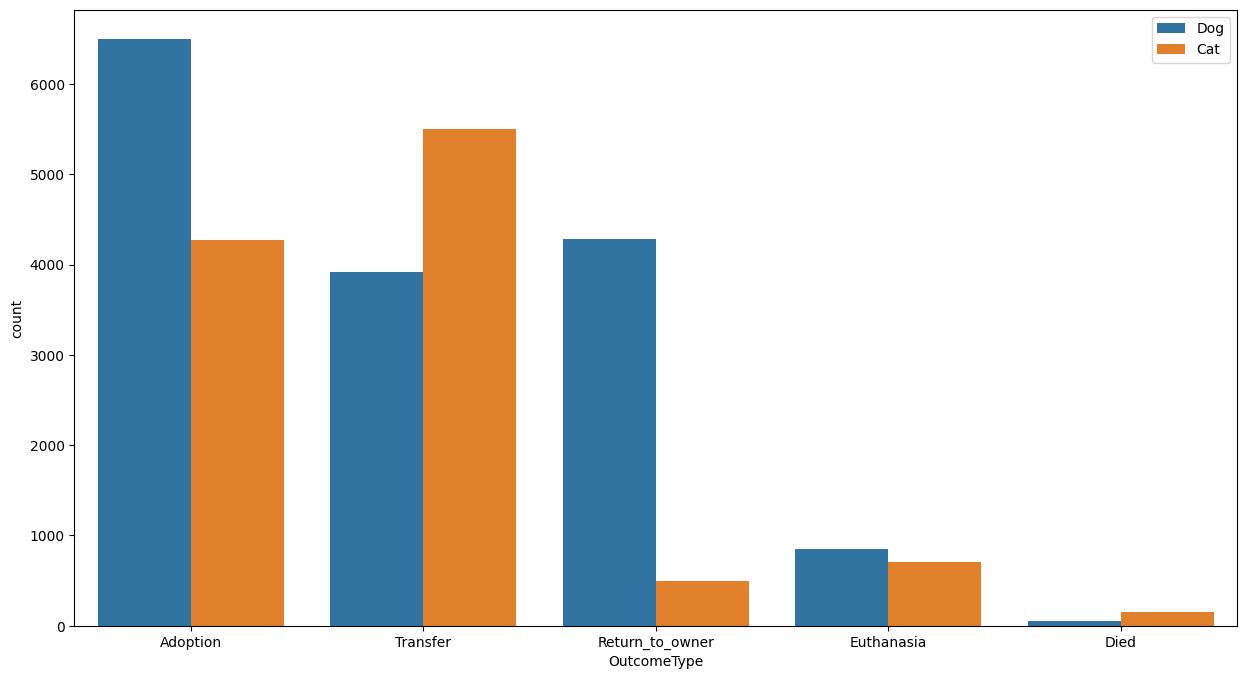

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='OutcomeType',order=data['OutcomeType'].value_counts().index, hue='AnimalType', data=data)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

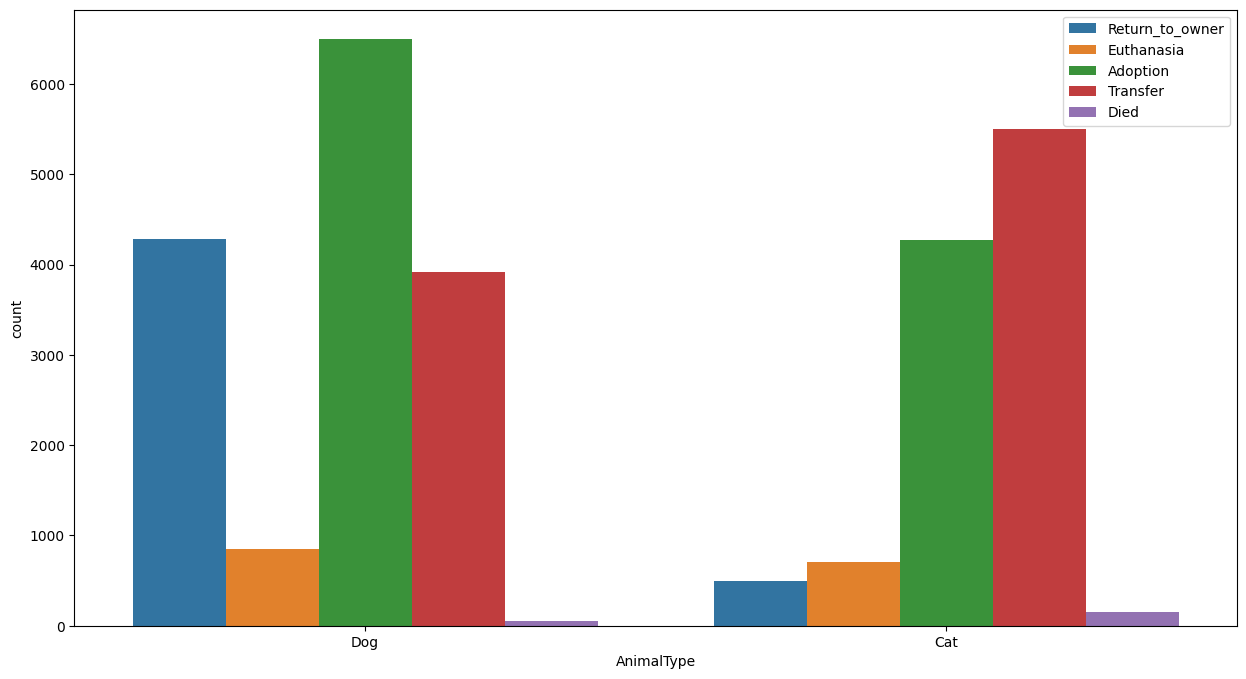

In [ ]:
# Dogs were often Adoption and Returned to owner, but Cats were ofter Transfered and Adoption
plt.figure(figsize=(15,8))
sns.countplot(x='AnimalType',order=data['AnimalType'].value_counts().index, hue='OutcomeType', data=data)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

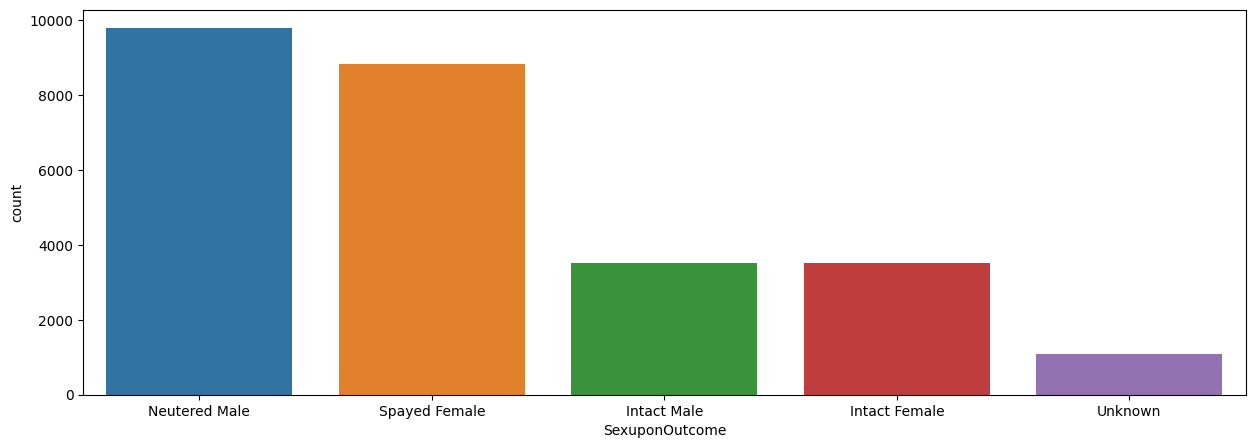

In [ ]:
# The most frequently sex are Spayed Female and Neutered Male
plt.figure(figsize=(15,5))
sns.countplot(x='SexuponOutcome', order=data['SexuponOutcome'].value_counts().index, data=data)
plt.show()

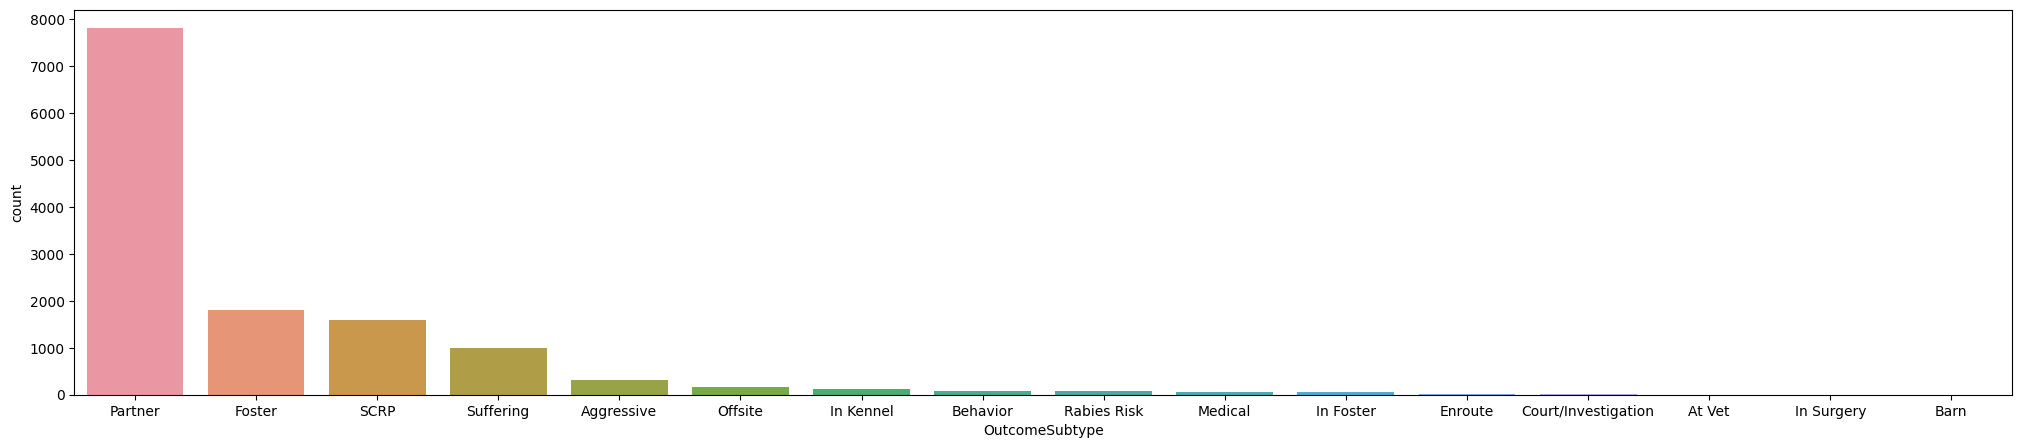

13612


In [ ]:
# Outcome sub type has a lot of NaN values and almost only one value Partner. I think we may delete this feature
plt.figure(figsize=(25,5))
sns.countplot(x='OutcomeSubtype', order=data['OutcomeSubtype'].value_counts().index, data=data)
plt.show()
print(data['OutcomeSubtype'].isna().sum())

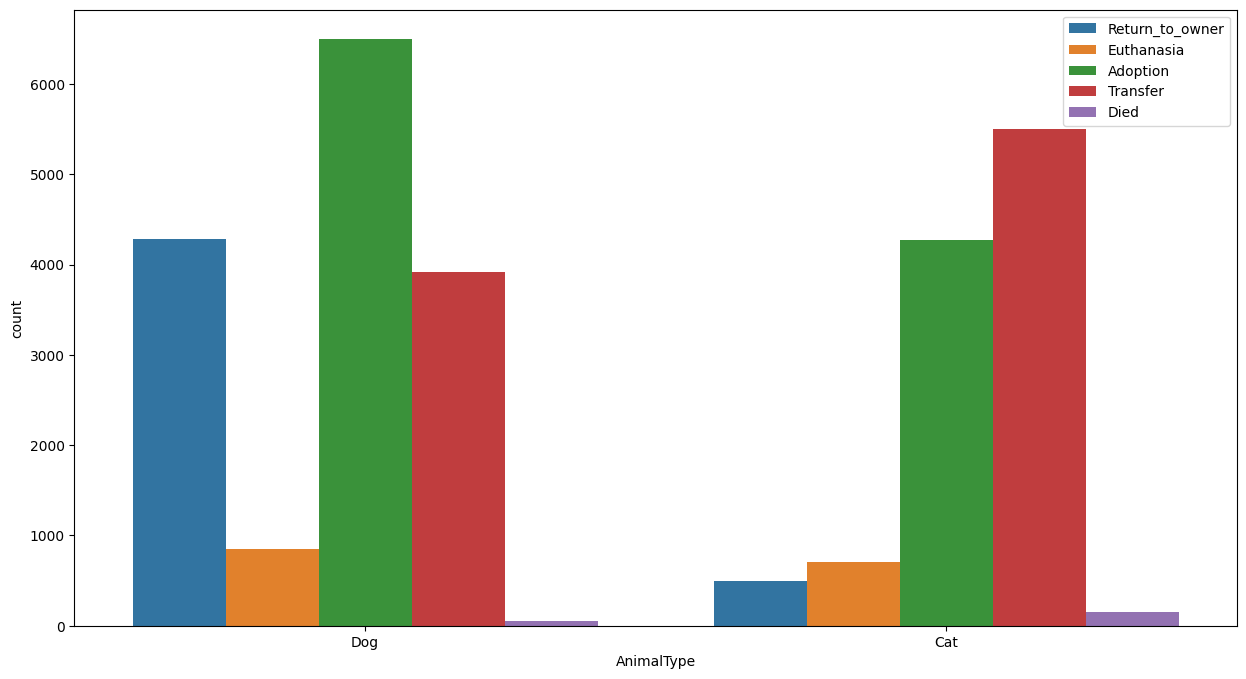

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='AnimalType',  order=data['AnimalType'].value_counts().index,  hue='OutcomeType',  data=data)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
data_mod = data.drop(['AnimalID', 'Name', 'OutcomeSubtype'], axis=1)

In [ ]:
data_mod.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [ ]:
data_mod.isna().sum()

DateTime           0
OutcomeType        0
AnimalType         0
SexuponOutcome     1
AgeuponOutcome    18
Breed              0
Color              0
dtype: int64

In [ ]:
# def age_converter(row):
#     age_string = row['AgeuponOutcome']
#     [age,unit] = age_string.split(" ")
#     unit = unit.lower()
#     if("day" in unit):
#         if age=='0': return 1
#         return int(age)
#     if("week" in unit):
#         if(age)=='0': return 7
#         return int(age)*7
#     elif("month" in unit):
#         if(age)=='0': return 30
#         return int(age) * 4*7
#     elif("year" in unit):
#         if(age)=='0': return 365
#         return int(age) * 4*12*7

# data['age_numeric'] = data.apply(age_converter, axis=1)

In [ ]:
def edit_age(row):
    age = row['AgeuponOutcome']
    if pd.isnull(age):
        return age
    age_unit = age.split(' ')[-1]
    age_val = int(age.split(' ')[0])
    if age_unit in ['day', 'days']:
        age_val /= 365
    elif age_unit in ['week', 'weeks']:
        age_val /= 52
    elif age_unit in ['month', 'months']:
        age_val /= 12
    return age_val


In [ ]:
data_mod

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...
26724,2015-05-14 11:56:00,Transfer,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,2016-01-20 18:59:00,Transfer,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,2015-03-09 13:33:00,Adoption,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,2014-04-27 12:22:00,Transfer,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [ ]:
data_mod["Age"] = data_mod.apply(lambda row: edit_age(row), axis=1)
data_mod = data_mod.drop('AgeuponOutcome', axis=1)
data_mod.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Age
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1.000000
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1.000000
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,2.000000
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0.057692
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2.000000


In [ ]:
data_mod.isna().sum()

DateTime           0
OutcomeType        0
AnimalType         0
SexuponOutcome     1
Breed              0
Color              0
Age               18
dtype: int64

In [ ]:
def get_excel_date(col):
    res = pd.to_datetime(col, errors='coerce')
    return res

In [ ]:
data_mod['DateTime'] = data_mod['DateTime'].apply(get_excel_date)
data_mod.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Age
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1.000000
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1.000000
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,2.000000
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0.057692
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2.000000


In [ ]:
data_mod.tail()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Age
26724,2015-05-14 11:56:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby/White,0.083333
26725,2016-01-20 18:59:00,Transfer,Cat,Spayed Female,Domestic Shorthair Mix,Brown Tabby,0.250000
26726,2015-03-09 13:33:00,Adoption,Dog,Neutered Male,Old English Bulldog Mix,White/Tan,4.000000
26727,2014-04-27 12:22:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Black,0.076923
26728,2015-07-02 09:00:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby/White,1.000000


In [ ]:
# Divide column Datetime for two columns with month and year separate
a = pd.to_datetime(data_mod['DateTime'])
data_mod['month'] = a.dt.month
data_mod['year'] = a.dt.year
data_mod.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Age,month,year
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1.000000,2,2014
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1.000000,10,2013
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,2.000000,1,2015
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0.057692,7,2014
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2.000000,11,2013


In [ ]:
# Check for NaN values
data_mod.isna().sum()

DateTime           0
OutcomeType        0
AnimalType         0
SexuponOutcome     1
Breed              0
Color              0
Age               18
month              0
year               0
dtype: int64

In [ ]:
data_mod = data_mod.drop(['DateTime'], axis=1)

In [ ]:
data_mod.head()

,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Age,month,year
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1.000000,2,2014
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1.000000,10,2013
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,2.000000,1,2015
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0.057692,7,2014
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2.000000,11,2013


In [ ]:
data_mod.isna().sum()

OutcomeType        0
AnimalType         0
SexuponOutcome     1
Breed              0
Color              0
Age               18
month              0
year               0
dtype: int64

In [ ]:
data_mod

,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Age,month,year
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1.000000,2,2014
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1.000000,10,2013
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,2.000000,1,2015
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0.057692,7,2014
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2.000000,11,2013
...,...,...,...,...,...,...,...,...
26724,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby/White,0.083333,5,2015
26725,Transfer,Cat,Spayed Female,Domestic Shorthair Mix,Brown Tabby,0.250000,1,2016
26726,Adoption,Dog,Neutered Male,Old English Bulldog Mix,White/Tan,4.000000,3,2015
26727,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Black,0.076923,4,2014


In [ ]:
data_mod = data_mod.fillna('missing')


In [ ]:
# Let`s use column Mode value for NaN
data_mod['Age'].replace(['missing'], '-1', inplace=True)

In [ ]:

data_mod['SexuponOutcome'].replace(['missing'], 'Neutered Male', inplace=True)
data_mod.isna().sum()

OutcomeType       0
AnimalType        0
SexuponOutcome    0
Breed             0
Color             0
Age               0
month             0
year              0
dtype: int64

In [ ]:
data_mod.Breed = [0 if 'Mix' in x else 1 for x in data.Breed]
data_mod['Color'] = data_mod['Color'].apply(lambda x : 1 if '/' in x else 0)

data_mod

,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Age,month,year
0,Return_to_owner,Dog,Neutered Male,0,1,1.0,2,2014
1,Euthanasia,Cat,Spayed Female,0,0,1.0,10,2013
2,Adoption,Dog,Neutered Male,0,1,2.0,1,2015
3,Transfer,Cat,Intact Male,0,0,0.057692,7,2014
4,Transfer,Dog,Neutered Male,1,0,2.0,11,2013
...,...,...,...,...,...,...,...,...
26724,Transfer,Cat,Intact Male,0,1,0.083333,5,2015
26725,Transfer,Cat,Spayed Female,0,0,0.25,1,2016
26726,Adoption,Dog,Neutered Male,0,1,4.0,3,2015
26727,Transfer,Cat,Intact Male,0,0,0.076923,4,2014


In [ ]:
# Transform categoricals data
animal_type = preprocessing.LabelEncoder()
data_mod.AnimalType = animal_type.fit_transform(data_mod.AnimalType)
sex = preprocessing.LabelEncoder()
data_mod.SexuponOutcome = sex.fit_transform(data_mod.SexuponOutcome)
# breed = preprocessing.LabelEncoder()
# data_mod.Breed = breed.fit_transform(data_mod.Breed)
# color = preprocessing.LabelEncoder()
# data_mod.Color = color.fit_transform(data_mod.Color)
outcome = preprocessing.LabelEncoder()
data_mod.OutcomeType = outcome.fit_transform(data_mod.OutcomeType)
data_mod.head()

,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Age,month,year
0,3,1,2,0,1,1.0,2,2014
1,2,0,3,0,0,1.0,10,2013
2,0,1,2,0,1,2.0,1,2015
3,4,0,1,0,0,0.057692,7,2014
4,4,1,2,1,0,2.0,11,2013


In [ ]:
data_mod.isna().sum()

OutcomeType       0
AnimalType        0
SexuponOutcome    0
Breed             0
Color             0
Age               0
month             0
year              0
dtype: int64

In [ ]:
# Divide dataframe for training and testing data
ytrain = data_mod['OutcomeType']
xtrain = data_mod.drop('OutcomeType', axis=1)

In [ ]:
ytrain.head()

0    3
1    2
2    0
3    4
4    4
Name: OutcomeType, dtype: int64

In [ ]:
xtrain

,AnimalType,SexuponOutcome,Breed,Color,Age,month,year
0,1,2,0,1,1.0,2,2014
1,0,3,0,0,1.0,10,2013
2,1,2,0,1,2.0,1,2015
3,0,1,0,0,0.057692,7,2014
4,1,2,1,0,2.0,11,2013
...,...,...,...,...,...,...,...
26724,0,1,0,1,0.083333,5,2015
26725,0,3,0,0,0.25,1,2016
26726,1,2,0,1,4.0,3,2015
26727,0,1,0,0,0.076923,4,2014


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(xtrain, ytrain, test_size=0.25)

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf_model = rf.fit(train_X, train_y)
train_predicted = rf_model.predict(train_X)
print(train_predicted)
tra_score=rf_model.score(train_X, train_y)
print('Accuracy:',accuracy_score(train_predicted,train_y))
train_proba = rf_model.predict_proba(train_X)
rfc = round(tra_score*100, 2)
print('Training acc:', round(tra_score*100, 2), '%')
print('Log Loss: ',log_loss(train_y,train_proba))
tra_score=rf_model.score(train_X, train_y)
rfc
joblib.dump(rf_model, 'random_forest_model.joblib')

[4 3 4 ... 0 0 0]
Accuracy: 0.7777112640925871
Training acc: 77.77 %
Log Loss:  0.4904713643670614


['random_forest_model.joblib']

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_X, train_y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logreg = log.predict(val_X)
acclog = accuracy_score(logreg,val_y)*100
acclog

57.219811461918304

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train_X,train_y)

DecisionTreeClassifier()

In [ ]:
dtree = tree.predict(val_X)
acctree = accuracy_score(dtree,val_y)*100
acctree

57.62382163698938

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_X,train_y)
kn = knn.predict(val_X)
accknn = accuracy_score(kn,val_y)*100
accknn

57.5340415980847

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
lda = LinearDiscriminantAnalysis()

In [ ]:
scores = cross_val_score(lda, train_X, train_y, cv=10)
acclda = scores.mean()*100
acclda

54.57943464691565

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
scores = cross_val_score(qda, train_X, train_y, cv=10)
accqda = scores.mean()*100
accqda


60.97470644745422

###confusion matrix

In [ ]:
#split into train and test data
x_train,x_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size=0.3,random_state=101)
#Import logistic regression module
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(x_train,y_train)
#test the model
prediction = lm.predict(x_test)
from sklearn.metrics import classification_report
print("LogisticRegression:")
print(classification_report(y_test,prediction))


LogisticRegression:
              precision    recall  f1-score   support

           0       0.55      0.78      0.64      3213
           1       0.00      0.00      0.00        51
           2       0.33      0.00      0.00       480
           3       0.43      0.23      0.30      1477
           4       0.58      0.56      0.57      2798

    accuracy                           0.55      8019
   macro avg       0.38      0.31      0.30      8019
weighted avg       0.52      0.55      0.51      8019



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

In [ ]:
models=pd.DataFrame({
    'Model':['RandomForestClassifier: ','LogisticRegression: ','DecisionTreeClassifier: ','K-Nearest Neighbours','LinearDiscriminantAnalysis: ','QuadraticDiscriminantAnalysis'],
    'Score':[rfc,acclog,acctree,accknn,acclda,accqda]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,RandomForestClassifier:,77.770000
5,QuadraticDiscriminantAnalysis,60.974706
2,DecisionTreeClassifier:,57.623822
3,K-Nearest Neighbours,57.534042
1,LogisticRegression:,57.219811
4,LinearDiscriminantAnalysis:,54.579435


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

[[2491    0    0  207  515]
 [   9    0    0    1   41]
 [ 106    0    1  101  272]
 [ 817    0    1  344  315]
 [1089    0    1  153 1555]]


<function matplotlib.pyplot.show(close=None, block=None)>

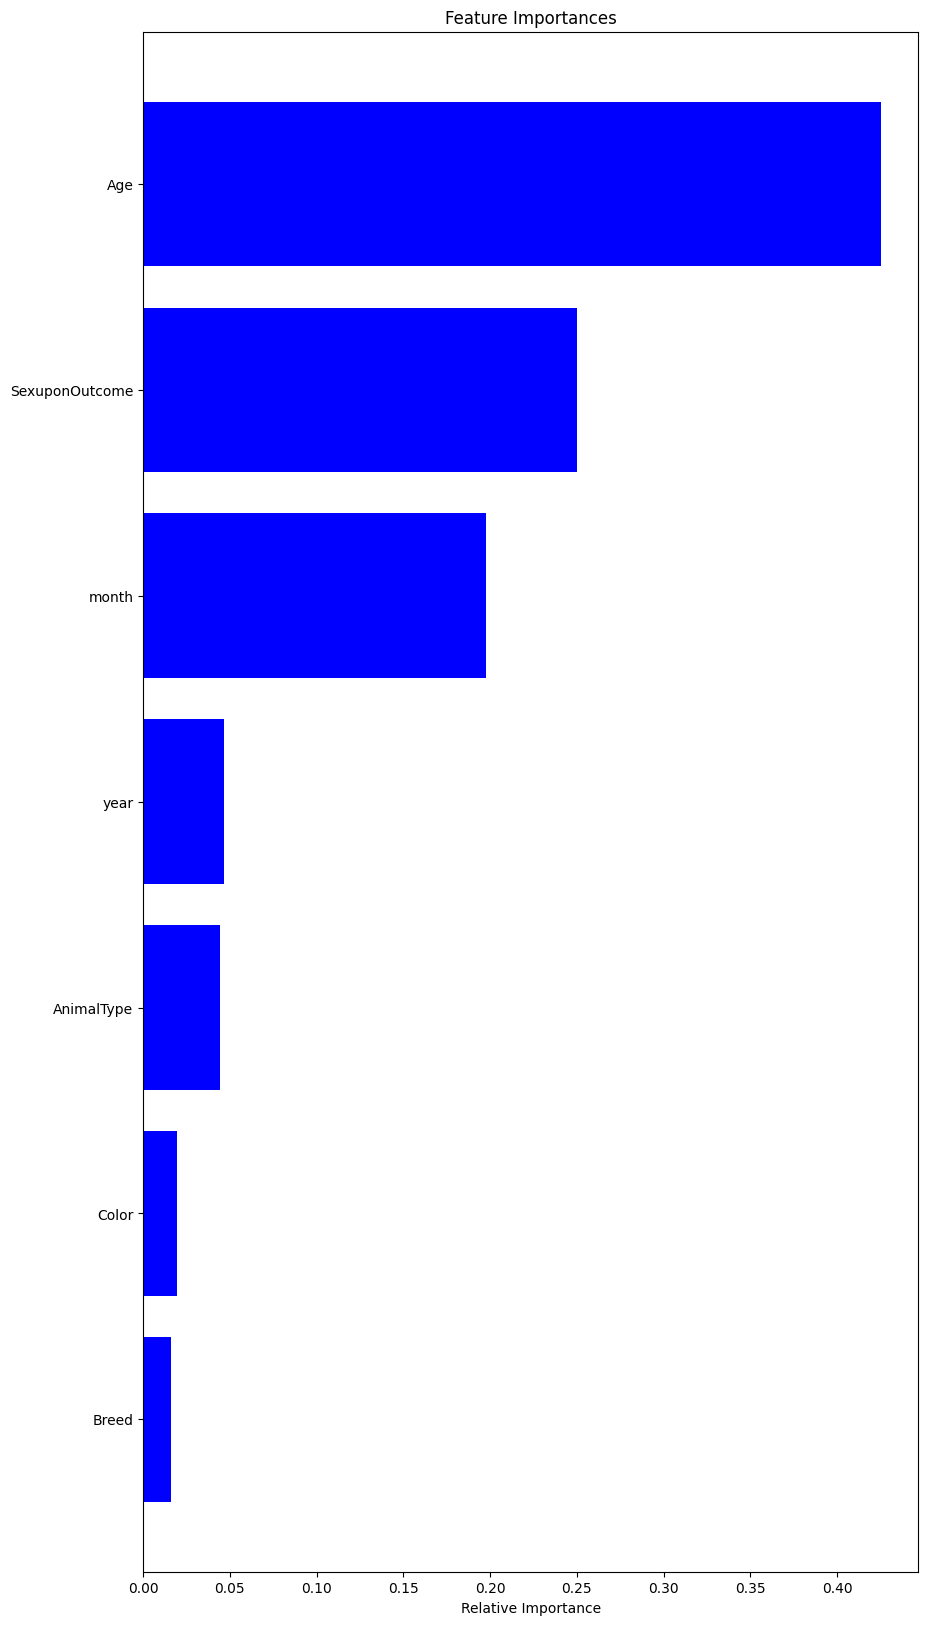

In [ ]:
features=xtrain.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show

##test

In [ ]:
test = pd.read_csv('/content/test.csv')
test

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
...,...,...,...,...,...,...,...,...
11451,11452,NaN,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11452,11453,NaN,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11453,11454,NaN,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico
11454,11455,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan


In [ ]:
import re

In [ ]:

test.columns

Index(['ID', 'Name', 'DateTime', 'AnimalType', 'SexuponOutcome',
       'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [ ]:
id = test["ID"].tolist()
len(id)

11456

In [ ]:
test.apply(lambda x: sum(x.isnull()/len(test)))

ID                0.000000
Name              0.281512
DateTime          0.000000
AnimalType        0.000000
SexuponOutcome    0.000000
AgeuponOutcome    0.000524
Breed             0.000000
Color             0.000000
dtype: float64

In [ ]:
test = test.drop('ID', axis=1)

In [ ]:
test = test.drop('Name',axis = 1)

In [ ]:
test.describe()

,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,11456,11456,11456,11450,11456,11456
unique,10575,2,5,45,913,277
top,2015-07-02 00:00:00,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,8,6656,4235,1768,3777,1219


In [ ]:
test["Age"] = test.apply(lambda row: edit_age (row), axis=1)
test =test.drop('AgeuponOutcome', axis=1)
test.head()

,DateTime,AnimalType,SexuponOutcome,Breed,Color,Age
0,2015-10-12 12:15:00,Dog,Intact Female,Labrador Retriever Mix,Red/White,0.833333
1,2014-07-26 17:59:00,Dog,Spayed Female,German Shepherd/Siberian Husky,Black/Tan,2.000000
2,2016-01-13 12:20:00,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby,1.000000
3,2013-12-28 18:12:00,Dog,Intact Male,Collie Smooth Mix,Tricolor,0.333333
4,2015-09-24 17:59:00,Dog,Neutered Male,Miniature Poodle Mix,White,2.000000


In [ ]:
test = test.fillna('missing')
test['Age'].replace(['missing'], '1', inplace=True)


In [ ]:
test

,DateTime,AnimalType,SexuponOutcome,Breed,Color,Age
0,2015-10-12 12:15:00,Dog,Intact Female,Labrador Retriever Mix,Red/White,0.833333
1,2014-07-26 17:59:00,Dog,Spayed Female,German Shepherd/Siberian Husky,Black/Tan,2.0
2,2016-01-13 12:20:00,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby,1.0
3,2013-12-28 18:12:00,Dog,Intact Male,Collie Smooth Mix,Tricolor,0.333333
4,2015-09-24 17:59:00,Dog,Neutered Male,Miniature Poodle Mix,White,2.0
...,...,...,...,...,...,...
11451,2014-07-08 14:50:00,Cat,Neutered Male,Domestic Shorthair Mix,Black,0.166667
11452,2014-10-21 12:57:00,Cat,Intact Female,Domestic Shorthair Mix,Blue,0.038462
11453,2014-09-29 09:00:00,Cat,Intact Female,Domestic Shorthair Mix,Calico,1.0
11454,2015-09-05 17:16:00,Dog,Neutered Male,German Shepherd Mix,Black/Tan,6.0


In [ ]:
test = test.apply(lambda x: x.fillna(x.value_counts().index[0]) if x.notnull().any() else x)



In [ ]:
test

,DateTime,AnimalType,SexuponOutcome,Breed,Color,Age
0,2015-10-12 12:15:00,Dog,Intact Female,Labrador Retriever Mix,Red/White,0.833333
1,2014-07-26 17:59:00,Dog,Spayed Female,German Shepherd/Siberian Husky,Black/Tan,2.0
2,2016-01-13 12:20:00,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby,1.0
3,2013-12-28 18:12:00,Dog,Intact Male,Collie Smooth Mix,Tricolor,0.333333
4,2015-09-24 17:59:00,Dog,Neutered Male,Miniature Poodle Mix,White,2.0
...,...,...,...,...,...,...
11451,2014-07-08 14:50:00,Cat,Neutered Male,Domestic Shorthair Mix,Black,0.166667
11452,2014-10-21 12:57:00,Cat,Intact Female,Domestic Shorthair Mix,Blue,0.038462
11453,2014-09-29 09:00:00,Cat,Intact Female,Domestic Shorthair Mix,Calico,1.0
11454,2015-09-05 17:16:00,Dog,Neutered Male,German Shepherd Mix,Black/Tan,6.0


In [ ]:
test.head()

,DateTime,AnimalType,SexuponOutcome,Breed,Color,Age
0,2015-10-12 12:15:00,Dog,Intact Female,Labrador Retriever Mix,Red/White,0.833333
1,2014-07-26 17:59:00,Dog,Spayed Female,German Shepherd/Siberian Husky,Black/Tan,2.0
2,2016-01-13 12:20:00,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby,1.0
3,2013-12-28 18:12:00,Dog,Intact Male,Collie Smooth Mix,Tricolor,0.333333
4,2015-09-24 17:59:00,Dog,Neutered Male,Miniature Poodle Mix,White,2.0


In [ ]:
a = pd.to_datetime(test['DateTime'])
test['month'] = a.dt.month
test['year'] = a.dt.year
test = test.drop('DateTime', axis=1)


In [ ]:
# test = test.drop('Name', axis=1)

In [ ]:
# test['Age'].replace(['missing'], '1', inplace=True)

In [ ]:
animal_type = preprocessing.LabelEncoder()
test.AnimalType = animal_type.fit_transform(test.AnimalType)

In [ ]:
test['Color'] = test['Color'].apply(lambda x : 1 if '/' in x else 0)


In [ ]:
sex = preprocessing.LabelEncoder()
test.SexuponOutcome = sex.fit_transform(test.SexuponOutcome)

In [ ]:
if 'Mix' in str(test.Breed):
    test.Breed = 0
else:
    test.Breed = 1


In [ ]:
# color = preprocessing.LabelEncoder()
# test.Color = color.fit_transform(test.Color)

In [ ]:

test.apply(lambda x: sum(x.isnull()/len(test)))

AnimalType        0.0
SexuponOutcome    0.0
Breed             0.0
Color             0.0
Age               0.0
month             0.0
year              0.0
dtype: float64

In [ ]:
test

,AnimalType,SexuponOutcome,Breed,Color,Age,month,year
0,1,0,0,1,0.833333,10,2015
1,1,3,0,1,2.0,7,2014
2,0,2,0,0,1.0,1,2016
3,1,1,0,0,0.333333,12,2013
4,1,2,0,0,2.0,9,2015
...,...,...,...,...,...,...,...
11451,0,2,0,0,0.166667,7,2014
11452,0,0,0,0,0.038462,10,2014
11453,0,0,0,0,1.0,9,2014
11454,1,2,0,1,6.0,9,2015


In [ ]:
X_test = test

In [ ]:
test_proba = rf_model.predict_proba(X_test)

In [ ]:
test_proba

array([[0.013     , 0.        , 0.01633333, 0.39014603, 0.58052063],
       [0.67485714, 0.        , 0.        , 0.21725821, 0.10788466],
       [0.90145992, 0.        , 0.        , 0.00206667, 0.09647342],
       ...,
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.34851905, 0.        , 0.00271429, 0.32884762, 0.31991905],
       [0.        , 0.        , 0.33100556, 0.17962302, 0.48937143]])

In [ ]:
sub = pd.read_csv('/content/sample_submission.csv')
sub

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,1,0,0,0,0
1,2,1,0,0,0,0
2,3,1,0,0,0,0
3,4,1,0,0,0,0
4,5,1,0,0,0,0
...,...,...,...,...,...,...
11451,11452,1,0,0,0,0
11452,11453,1,0,0,0,0
11453,11454,1,0,0,0,0
11454,11455,1,0,0,0,0


In [ ]:
sub.to_csv('submission.csv', index=False)

In [ ]:
sub.iloc[:,1:] = test_proba
sub


,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.013000,0.0,0.016333,0.390146,0.580521
1,2,0.674857,0.0,0.000000,0.217258,0.107885
2,3,0.901460,0.0,0.000000,0.002067,0.096473
3,4,0.018108,0.0,0.129000,0.056000,0.796892
4,5,0.498691,0.0,0.000000,0.197046,0.304263
...,...,...,...,...,...,...
11451,11452,0.938975,0.0,0.000000,0.000000,0.061025
11452,11453,0.000000,0.0,0.000000,0.000000,1.000000
11453,11454,0.000000,0.0,0.000000,0.000000,1.000000
11454,11455,0.348519,0.0,0.002714,0.328848,0.319919


#Gradio

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import gradio as gr


In [ ]:
input_components = [
    gr.inputs.Textbox(label="AnimalType"),
    gr.inputs.Textbox(label="SexuponOutcome"),
    gr.inputs.Textbox(label="Breed"),
    gr.inputs.Textbox(label="Color"),
    gr.inputs.Textbox(label="Age"),
    gr.inputs.Number(label="month"),
    gr.inputs.Number(label="year")
]


/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(


In [ ]:
def edit_age(AgeuponOutcome):
    age = AgeuponOutcome
    if pd.isnull(age):
        return age
    age_unit = age.split(' ')[-1]
    age_val = int(age.split(' ')[0])
    if age_unit in ['day', 'days']:
        age_val /= 365
    elif age_unit in ['week', 'weeks']:
        age_val /= 52
    elif age_unit in ['month', 'months']:
        age_val /= 12
    return age_val


In [ ]:
def predict_Outcome(AnimalType, SexuponOutcome, Breed, Color, Age, month, year):
    AnimalType = 1 if AnimalType == 'Dog' else 0
    if(SexuponOutcome == "Neutered Male"):
      SexuponOutcome = 2
    elif(SexuponOutcome == "Spayed Female"):
      SexuponOutcome = 3
    elif(SexuponOutcome == "Intact Male"):
      SexuponOutcome = 1
    elif(SexuponOutcome == "Intact Female"):
      SexuponOutcome = 0
    else:
      SexuponOutcome = 4
    Breed = 0 if 'Mix' in Breed else 1
    Color = 1 if '/' in Color else 0
    Age = edit_age(Age)
    sample = np.array([AnimalType, SexuponOutcome, Breed, Color, Age, month, year])
    probs = rf.predict_proba(sample.reshape(1, -1))[0]
    predicted_class = np.argmax(probs)
    if(predicted_class == 0):
      return "Adoption"
    elif(predicted_class==1):
      return "Died"
    elif(predicted_class==2):
      return "Euthanasia"
    elif(predicted_class==3):
      return "Return_to_owner"
    return "transfer"


In [ ]:
interface = gr.Interface(
    fn=predict_Outcome,
    inputs=input_components,
    outputs=gr.outputs.Label(num_top_classes=1, label='Output'),
    title="AnimalShelter",
    description="Predict the outcome of an animal in a shelter",
    layout="vertical",
    theme="compact"
)

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:528: UserWarning: Cannot load compact. Caught Exception: The space compact does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `layout` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [ ]:
interface.launch(debug = True, share = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://9169e64627b7d6ece8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9169e64627b7d6ece8.gradio.live


#Train_Model

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
# ... code to train the model ...

# Save the model to a file
joblib.dump(rf, 'random_forest_model.joblib')
